# 1 基础练习
## 1-1 相关系数

In [3]:
D.history_data(["000001.SZA"])

,volume,date,instrument,close,open
0,1760832,2005-01-04,000001.SZA,163.100143,164.851212
1,3222144,2005-01-05,000001.SZA,161.599213,163.100143
2,2666413,2005-01-06,000001.SZA,163.100143,162.599838
3,1886150,2005-01-07,000001.SZA,162.849991,164.601059
4,2632055,2005-01-10,000001.SZA,164.851212,162.849991
...,...,...,...,...,...
4449,99126040,2023-04-26,000001.SZA,1380.906860,1395.718628
4450,100409337,2023-04-27,000001.SZA,1396.857910,1374.070679
4451,144525434,2023-04-28,000001.SZA,1429.899414,1396.857910
4452,147826438,2023-05-04,000001.SZA,1450.407959,1412.808960


In [2]:
import numpy as np
import statsmodels.tsa.stattools as sts
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels import regression
import statsmodels.api as sm
import math
import talib as ta

BQInputRejected: 编译错误，1: 抱歉，平台暂时不支持此模块：IPython.core.interactiveshell.InteractiveShell

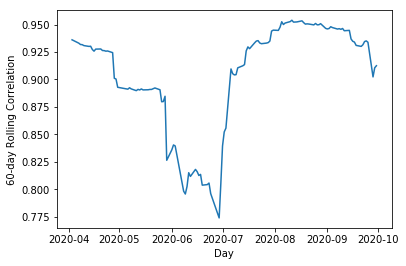

In [4]:
Stock1 = D.history_data(["601186.SHA"],start_date='2020-01-01',end_date='2020-10-01',fields = ['close'])['close'].pct_change()[1:]
Stock2 = D.history_data(["601390.SHA"],start_date='2020-01-01',end_date='2020-10-01',fields = ['close'])['close'].pct_change()[1:]
rolling_corr = pd.rolling_corr(Stock1,Stock2,60)
rolling_corr.index = D.trading_days(start_date='2020-01-01',end_date='2020-10-01').date[1:]
plt.plot(rolling_corr)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')
plt.show()

In [9]:
import time

In [11]:
print(time.strftime("%H:%M:%S:%ms"))
print(len(D.history_data(instruments='000001.SZA',fields=['open', 'high', 'low', 'close', 'volume'])))
print(time.strftime("%H:%M:%S:%ms"))

15:56:28:08s


4277
15:56:44:08s


In [5]:
instruments = D.instruments()[:10]
Stock_matrix = D.history_data(instruments,start_date='2020-01-01',end_date='2020-10-01',fields=['close'])  # 不用收盘价数据，而是用收益率数据
Stock_matrix = pd.pivot_table(Stock_matrix,values='close',index=['date'],columns=['instrument']).apply(lambda x:x.pct_change())
Stock_matrix.head()  # 通过pivot_table函数将Stock_matrix整理成一个以股票日收益率为列的df 
Stock_matrix.corr()

instrument,000001.SZA,000002.SZA,000004.SZA,000005.SZA,000006.SZA,000007.SZA,000008.SZA,000009.SZA,000010.SZA,000011.SZA
instrument,,,,,,,,,,
000001.SZA,1.000000,0.666050,0.177712,0.368887,0.305110,0.053016,0.485957,0.326604,0.176278,0.165968
000002.SZA,0.666050,1.000000,0.131964,0.307848,0.365388,0.146608,0.477815,0.272567,0.062999,0.175258
000004.SZA,0.177712,0.131964,1.000000,0.301467,0.272895,0.247229,0.355153,0.425124,0.196762,0.190590
000005.SZA,0.368887,0.307848,0.301467,1.000000,0.592598,0.379438,0.585575,0.484581,0.255197,0.425782
000006.SZA,0.305110,0.365388,0.272895,0.592598,1.000000,0.224633,0.401889,0.364118,0.115475,0.605184
000007.SZA,0.053016,0.146608,0.247229,0.379438,0.224633,1.000000,0.371850,0.253942,0.137375,0.152511
000008.SZA,0.485957,0.477815,0.355153,0.585575,0.401889,0.371850,1.000000,0.393316,0.303172,0.253129
000009.SZA,0.326604,0.272567,0.425124,0.484581,0.364118,0.253942,0.393316,1.000000,0.229184,0.289697
000010.SZA,0.176278,0.062999,0.196762,0.255197,0.115475,0.137375,0.303172,0.229184,1.000000,0.119837


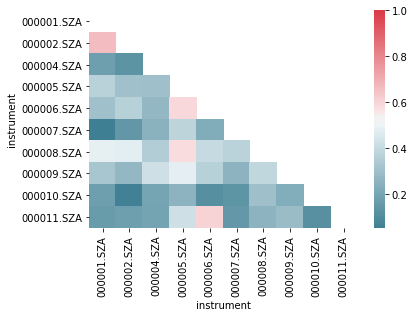

In [6]:
# 绘制相关系数热力图
mask = np.zeros_like(Stock_matrix.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Stock_matrix.corr(), mask=mask, cmap=cmap)
plt.show()

## 1-2 线性回归

In [8]:
# 编辑线性回归函数
def linreg(X,Y):
    # 运行线性回归
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit()
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    # 返回信息并绘图
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * b + a
    plt.scatter(X, Y, alpha=0.3) # 显示原始数据
    plt.plot(X2, Y_hat, 'r', alpha=0.9);  # 添加拟合直线
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     32.24
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           5.35e-08
Time:                        15:57:35   Log-Likelihood:                 375.63
No. Observations:                 183   AIC:                            -747.3
Df Residuals:                     181   BIC:                            -740.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.002      0.368      0.713      -0.004       0.005
x1             0.8444      0.149      5.678      0.000       0.551       1.138
==============================================================================
Omnibus:                       13.282   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.072
Skew:                           0.616   Prob(JB):                     0.000880
Kurtosis:                       3.574   Cond. No.                         64.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

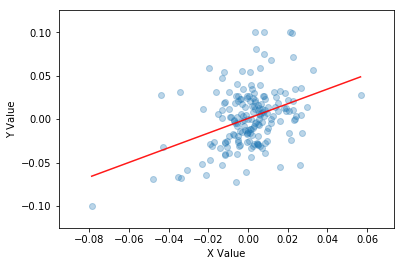

In [9]:
start_date = '2020-01-01'
end_date = '2020-10-11'
# 获取浦发银行的价格数据
asset = D.history_data('603363.SHA',start_date,end_date,fields=['close']).set_index('date')['close']
benchmark = D.history_data('000300.SHA',start_date,end_date,fields=['close']).set_index('date')['close']
 
# 通过价格数据计算收益率数据并删除第一个元素，因为其为缺失值
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

linreg(r_b.values, r_a.values)

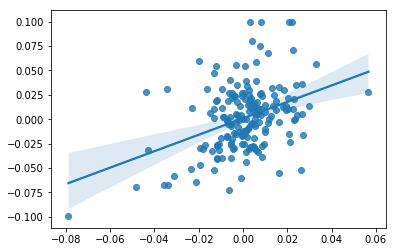

In [10]:
import seaborn

seaborn.regplot(r_b.values, r_a.values)

## 1-3 多元线性回归

In [13]:
asset1 =  D.history_data('603363.SHA',start_date,end_date,fields=['close']).set_index('date')['close']
asset2 =  D.history_data('000876.SZA',start_date,end_date,fields=['close']).set_index('date')['close']
benchmark = D.history_data('000300.SHA',start_date,end_date,fields=['close']).set_index('date')['close']
slr = regression.linear_model.OLS(asset1, sm.add_constant(asset2)).fit()
slr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1045.
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           2.49e-77
Time:                        16:11:58   Log-Likelihood:                -300.28
No. Observations:                 184   AIC:                             604.6
Df Residuals:                     182   BIC:                             611.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8389      0.519      7.391      0.000       2.814       4.864
close          0.0312      0.001     32.323      0.000       0.029       0.033
==============================================================================
Omnibus:                        0.296   Durbin-Watson:                   0.171
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.106
Skew:                           0.038   Prob(JB):                        0.948
Kurtosis:                       3.089   Cond. No.                     3.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
mlr = regression.linear_model.OLS(asset1, sm.add_constant(np.column_stack((asset2, benchmark)))).fit()
prediction = mlr.params[0] + mlr.params[1]*asset2 + mlr.params[2]*benchmark
print('SLR beta of asset2:', slr.params[1], '\nMLR beta of asset2:', mlr.params[1], '\nMLR beta of 000300:', mlr.params[2])
mlr.summary()

SLR beta of asset2: 0.03123220311536394 
MLR beta of asset2: 0.029519495273335698 
MLR beta of 000300: 0.0009241484113690648


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 asset1   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     561.3
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           2.49e-78
Time:                        16:20:03   Log-Likelihood:                -294.18
No. Observations:                 184   AIC:                             594.4
Df Residuals:                     181   BIC:                             604.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8516      0.986      0.863      0.389      -1.095       2.798
x1             0.0295      0.001     27.957      0.000       0.027       0.032
x2             0.0009      0.000      3.523      0.001       0.000       0.001
==============================================================================
Omnibus:                        0.966   Durbin-Watson:                   0.180
Prob(Omnibus):                  0.617   Jarque-Bera (JB):                0.622
Skew:                          -0.080   Prob(JB):                        0.733
Kurtosis:                       3.235   Cond. No.                     4.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

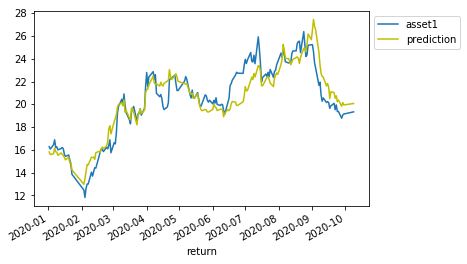

In [31]:
asset1.name = 'asset1'
asset2.name = 'asset2'
benchmark.name = 'benchmark'
prediction.name = 'prediction'

asset1.plot()
# asset2.plot()
# benchmark.plot()
prediction.plot(color='y')
plt.xlabel('return')
plt.legend(bbox_to_anchor=(1,1), loc=2)

# 2部分接口

In [2]:
DataSource('bar1d_index_CN_STOCK_A').read().head(5)  # 指数的列表 https://bigquant.com/docs/datasource/data_basic_info_index_CN_STOCK_A.html

,turn,adjust_factor,instrument,date,open,volume,low,close,high,amount
0,0.4946,1.0,SW460000.HIX,2005-01-04,767.630005,9230000,753.859985,766.140015,771.070007,4.961000e+07
1,NaN,1.0,399705.ZIX,2005-01-04,808.695984,166366423,799.619019,801.317017,808.695984,1.128931e+09
2,NaN,1.0,399704.ZIX,2005-01-04,1018.804993,22459843,990.697021,991.625000,1018.804993,1.398407e+08
3,NaN,1.0,399702.ZIX,2005-01-04,1007.507019,192162967,992.698975,993.773010,1007.507019,1.273213e+09
4,NaN,1.0,399701.ZIX,2005-01-04,1108.605957,125554145,1092.102051,1093.844971,1108.605957,8.910173e+08


In [1]:
DataSource('basic_info_index_CN_STOCK_A').read().head() # 指数基本信息

,instrument,name
0,000908.HIX,沪深300能源
1,H00300.CSI,沪深300全收益
2,H00852.HIX,中证1000全收益
3,H00903.CSI,中证100全收益
4,H00904.CSI,中证200全收益


In [4]:
df = DataSource('index_element_weight').read() # 指数成分及权重
df[df['instrument_index']=='000300.HIX'][df['date']=='2020-10-12'].head()#['instrument']

,instrument,instrument_index,date,weight
15416996,603019.SHA,000300.HIX,2020-10-12,0.00240
15417231,002157.SZA,000300.HIX,2020-10-12,0.00139
15417343,601021.SHA,000300.HIX,2020-10-12,0.00101
15417463,601155.SHA,000300.HIX,2020-10-12,0.00193
15417566,601857.SHA,000300.HIX,2020-10-12,0.00244


In [1]:
df = DataSource('industry_CN_STOCK_A').read()  # 行业概念，基于申万标准
df.head()

,instrument,industry_sw_level1,industry_sw_level3,concept,date,industry_sw_level2
0,000001.SHA,0,0,0,2005-01-04,0
1,000418.SZA,330000,330103,含B股的A股;超涨;未进行股改板块,2005-01-04,330100
2,000603.SZA,240000,240303,ST;未进行股改板块,2005-01-04,240300
3,600562.SHA,650000,650301,未进行股改板块,2005-01-04,650300
4,600680.SHA,710000,710101,含B股的A股;超跌;未进行股改板块,2005-01-04,710100


In [3]:
df[df['instrument']=='600763.SHA'].tail()  # 查询某个股的历史行业分类信息

,instrument,industry_sw_level1,industry_sw_level3,concept,date,industry_sw_level2
10755060,600763.SHA,370000,370601,成交主力;陆股通重仓;大盘股;高价股;全A(等权);养老产业;超涨;茅;三胎;标普道琼斯中国...,2021-08-04,370600
10762219,600763.SHA,370000,370601,成交主力;陆股通重仓;大盘股;高价股;全A(等权);养老产业;超涨;茅;三胎;标普道琼斯中国...,2021-08-05,370600
10763987,600763.SHA,370000,370601,成交主力;陆股通重仓;大盘股;高价股;全A(等权);养老产业;下跌点位贡献;超涨;茅;三胎;...,2021-08-06,370600
10771117,600763.SHA,370000,370601,成交主力;陆股通重仓;陆股通持续净卖出;大盘股;高价股;全A(等权);养老产业;下跌点位贡献...,2021-08-09,370600
10772895,600763.SHA,370000,370601,成交主力;陆股通重仓;大盘股;高价股;全A(等权);养老产业;超涨;茅;三胎;标普道琼斯中国...,2021-08-10,370600


In [6]:
df = DataSource('basic_info_CN_FUND').read()  # 查询基金的基本信息
df[df['type']=='ETF'].head()
# df[df['instrument'] == '159870.ZOF']

,instrument,abbreviation_name,type,list_date,delist_date,name
1,159908.ZOF2,nan,ETF,2018-12-10,2200-01-01,博时创业板ETF
83,510680.HOF2,nan,ETF,2015-12-15,2200-01-01,万家上证50ETF
84,511220.HOF2,nan,ETF,2019-04-24,2200-01-01,海富通上证城投债ETF
85,512990.HOF2,nan,ETF,2018-09-17,2200-01-01,华夏MSCI中国A股国际通ETF
992,159001.ZOF,YFDBZJA,ETF,2014-10-20,2200-01-01,易方达保证金A


In [8]:
df = DataSource('bar1d_CN_FUND').read('512690.HOF',start_date='2019-01-01',end_date='20210101')  # ,fields = ['instrument', 'date', 'close']
df.head() 

,instrument,open,high,low,close,volume,amount,date,adjust_factor
0,512690.HOF,0.944,0.984,0.908,0.908,18484261.0,17287144.0,2019-05-06,1.0
1,512690.HOF,0.915,0.962,0.915,0.951,20325800.0,19239358.0,2019-05-07,1.0
2,512690.HOF,0.939,0.975,0.926,0.953,21940279.0,20946175.0,2019-05-08,1.0
3,512690.HOF,0.938,0.949,0.902,0.915,22240100.0,20504939.0,2019-05-09,1.0
4,512690.HOF,0.928,0.975,0.925,0.967,29058518.0,27679929.0,2019-05-10,1.0


In [1]:
DataSource('adjust_factor_CN_FUND').read('159928.ZOF')

,adjust_factor,instrument,date,discount_rate
0,1.0,159928.ZOF,2020-06-10,0.003342
1,1.0,159928.ZOF,2020-06-11,-0.016309
2,1.0,159928.ZOF,2020-06-12,0.001800
3,1.0,159928.ZOF,2020-06-15,-0.006243
4,1.0,159928.ZOF,2020-06-16,0.010689
...,...,...,...,...
221,1.0,159928.ZOF,2021-05-26,-0.006246
222,1.0,159928.ZOF,2021-05-27,0.003130
223,1.0,159928.ZOF,2021-05-28,-0.007945
224,1.0,159928.ZOF,2021-05-31,0.002754


In [10]:
df = DataSource('index_element_weight').read()  # 指数成分及权重数据
set(df['instrument_index'].to_list())

{'000016.HIX',
 '000300.HIX',
 '000852.HIX',
 '000905.HIX',
 '399606.ZIX',
 'H00300.CSI',
 'H00852.CSI',
 'H00852.HIX',
 'H00903.CSI',
 'H00904.CSI',
 'H00905.CSI',
 'H00906.CSI',
 'H00907.CSI'}

## 3 CVXGRP 凸优化

In [3]:
# Generate data for long only portfolio optimization.
import numpy as np
import scipy.sparse as sp
np.random.seed(1)
n = 10
mu = np.abs(np.random.randn(n, 1))
Sigma = np.random.randn(n, n)
Sigma = Sigma.T.dot(Sigma)
# Long only portfolio optimization.
import cvxpy as cp

w = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
ret = mu.T@w 
risk = cp.quad_form(w, Sigma)
prob = cp.Problem(cp.Maximize(ret - gamma*risk), 
               [cp.sum(w) == 1, 
                w >= 0])

In [12]:
# Compute trade-off curve.
SAMPLES = 100
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value

# Plot long only trade-off curve.
import matplotlib.pyplot as plt
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

array([2.5634233 , 2.5634233 , 2.5634233 , 2.5634233 , 2.5634233 ,
       2.5634233 , 2.5634233 , 2.5634233 , 2.5634233 , 2.5634233 ,
       2.5634233 , 2.5634233 , 2.5634233 , 2.5634233 , 2.5634233 ,
       2.44682361, 2.32825712, 2.22982186, 2.14861297, 2.02249225,
       1.88862637, 1.75816601, 1.61680421, 1.48031376, 1.36247014,
       1.26128505, 1.17492456, 1.10168756, 1.03999184, 0.98836749,
       0.94545612, 0.91001353, 0.88091365, 0.85348599, 0.80615767,
       0.75981402, 0.72020836, 0.68720222, 0.65947519, 0.60984747,
       0.56744391, 0.53144217, 0.50107756, 0.4756393 , 0.45446974,
       0.43696538, 0.42257881, 0.41082002, 0.4012567 , 0.3935129 ,
       0.38726611, 0.38224313, 0.37821513, 0.37333276, 0.36893857,
       0.36567671, 0.3643926 , 0.36337174, 0.36256068, 0.36191664,
       0.36140543, 0.3609998 , 0.36067802, 0.3604228 , 0.36022042,
       0.36005996, 0.35993275, 0.3598319 , 0.35975196, 0.35968859,
       0.35963837, 0.35959857, 0.35956702, 0.35954201, 0.35952

In [17]:
ret_data

array([2.3015387 , 2.3015387 , 2.3015387 , 2.3015387 , 2.3015387 ,
       2.3015387 , 2.3015387 , 2.3015387 , 2.3015387 , 2.3015387 ,
       2.3015387 , 2.3015387 , 2.3015387 , 2.3015387 , 2.3015387 ,
       2.26972928, 2.23544957, 2.20493325, 2.17776716, 2.13219313,
       2.08171705, 2.0300465 , 1.97178831, 1.91401997, 1.86259372,
       1.81681329, 1.77605887, 1.73977867, 1.70748148, 1.67873004,
       1.65313508, 1.63035005, 1.61006648, 1.58911998, 1.55054361,
       1.51046866, 1.47414236, 1.44180414, 1.41257982, 1.35724391,
       1.30798305, 1.26413028, 1.22509189, 1.19033933, 1.15940207,
       1.13186125, 1.10734401, 1.08551838, 1.06608888, 1.04879245,
       1.0333949 , 1.01968778, 1.00748548, 0.99098264, 0.974587  ,
       0.9611123 , 0.95516576, 0.94987207, 0.94515954, 0.94096438,
       0.93722978, 0.93390518, 0.93094558, 0.92831089, 0.92596546,
       0.92387751, 0.9220188 , 0.92036414, 0.91889113, 0.91757985,
       0.91641252, 0.91537334, 0.91444825, 0.91362473, 0.91289

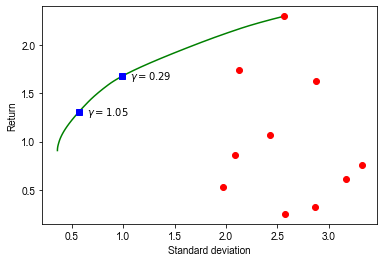

In [18]:
markers_on = [29, 40]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+.08, ret_data[marker]-.03))
for i in range(n):
    plt.plot(cp.sqrt(Sigma[i,i]).value, mu[i], 'ro')
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

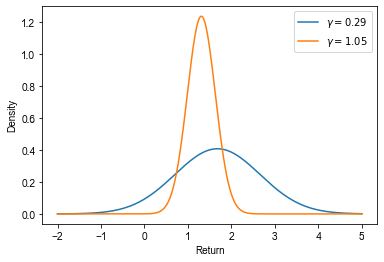

In [11]:
# Plot return distributions for two points on the trade-off curve.
import scipy.stats as spstats


plt.figure()
for midx, idx in enumerate(markers_on):
    gamma.value = gamma_vals[idx]
    prob.solve()
    x = np.linspace(-2, 5, 1000)
    plt.plot(x, spstats.norm.pdf(x, ret.value, risk.value), label=r"$\gamma = %.2f$" % gamma.value)

plt.xlabel('Return')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

In [3]:
df = D.history_data(["601186.SHA"],start_date='2020-01-01',end_date='2020-10-01',fields = ['close'])
df

,instrument,date,close
0,601186.SHA,2020-01-02,12.681368
1,601186.SHA,2020-01-03,12.596095
2,601186.SHA,2020-01-06,12.474276
3,601186.SHA,2020-01-07,12.583913
4,601186.SHA,2020-01-08,12.303729
...,...,...,...
178,601186.SHA,2020-09-24,10.514132
179,601186.SHA,2020-09-25,10.451771
180,601186.SHA,2020-09-28,10.426826
181,601186.SHA,2020-09-29,10.414353


In [20]:
df['ta_ma20'] = ta.SMA(df['close'], timeperiod=20)  # +MA20
df['pd_ma20'] = df['close'].rolling(20).mean()
df['ta_ema20'] = ta.EMA(df['close'], timeperiod=20)  # +MA20
df['pd_ema20'] = df['close'].ewm(span=20, min_periods=20, adjust=False).mean()
df.head(50)

,instrument,date,close,ta_ma20,pd_ma20,ta_ema20,pd_ema20
0,601186.SHA,2020-01-02,12.681368,NaN,NaN,NaN,NaN
1,601186.SHA,2020-01-03,12.596095,NaN,NaN,NaN,NaN
2,601186.SHA,2020-01-06,12.474276,NaN,NaN,NaN,NaN
3,601186.SHA,2020-01-07,12.583913,NaN,NaN,NaN,NaN
4,601186.SHA,2020-01-08,12.303729,NaN,NaN,NaN,NaN
5,601186.SHA,2020-01-09,12.413366,NaN,NaN,NaN,NaN
6,601186.SHA,2020-01-10,12.315911,NaN,NaN,NaN,NaN
7,601186.SHA,2020-01-13,12.376821,NaN,NaN,NaN,NaN
8,601186.SHA,2020-01-14,12.401184,NaN,NaN,NaN,NaN
9,601186.SHA,2020-01-15,12.206274,NaN,NaN,NaN,NaN


In [4]:
df = DataSource("bar1d_CN_STOCK_A").read(instrument='000001.SZA', start_date="2000-01-02", end_date="2001-06-30")
df

## 读取历史行情数据

In [2]:
# 读取数据  默认会返回全部证券代码数据, 通过指定参数 instruments 可以读取到指定的证券代码数据
df = DataSource("bar1d_CN_STOCK_A").read(instruments='000001.SZA')#.read(start_date="2020-06-01", end_date="2020-06-30")


In [ ]:
df = history(1000,
unit='1d',
security_list='000001.SZA',
df=True,
skip_paused=False,
fq='pre')
df

In [6]:
df.to_csv('bfq.csv')

In [7]:
df[['date', 'instrument', 'close', 'adjust_factor']].drop_duplicates(['adjust_factor'])

,date,instrument,close,adjust_factor
0,2005-01-04,000001.SZA,163.100143,25.015360
592,2007-06-20,000001.SZA,858.486023,27.524401
927,2008-10-31,000001.SZA,300.529297,35.905533
1892,2012-10-19,000001.SZA,485.807190,36.173283
2050,2013-06-20,000001.SZA,652.767517,58.387077
2288,2014-06-12,000001.SZA,689.931396,71.053696
2491,2015-04-13,000001.SZA,1422.342163,85.994080
2780,2016-06-16,000001.SZA,897.778198,104.758255
3048,2017-07-21,000001.SZA,1157.702759,106.308792
3244,2018-05-14,000001.SZA,1188.532471,106.308800


In [1]:
# 读取数据  默认会返回全部证券代码数据, 通过指定参数 instruments 可以读取到指定的证券代码数据
df = DataSource("instruments_CN_STOCK_A").read(start_date="2020-06-01", end_date="2020-06-30")
df

,instrument,date,name
0,000001.SZA,2020-06-01,平安银行
1,000002.SZA,2020-06-01,万科A
2,000004.SZA,2020-06-01,国农科技
3,000005.SZA,2020-06-01,世纪星源
4,000006.SZA,2020-06-01,深振业A
...,...,...,...
77264,688558.SHA,2020-06-30,国盛智科
77265,688566.SHA,2020-06-30,吉贝尔
77266,688588.SHA,2020-06-30,凌志软件
77267,688598.SHA,2020-06-30,金博股份


In [5]:
# df.query("date=='2020-06-01'")
df.query("instrument=='000001.SZA'")

,instrument,date,name
0,000001.SZA,2020-06-01,平安银行
3852,000001.SZA,2020-06-02,平安银行
7705,000001.SZA,2020-06-03,平安银行
11559,000001.SZA,2020-06-04,平安银行
15413,000001.SZA,2020-06-05,平安银行
19269,000001.SZA,2020-06-08,平安银行
23128,000001.SZA,2020-06-09,平安银行
26988,000001.SZA,2020-06-10,平安银行
30850,000001.SZA,2020-06-11,平安银行
34712,000001.SZA,2020-06-12,平安银行
